In [ ]:
!pip install pytube
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras.utils as image
import cv2
from google.colab.patches import cv2_imshow
import random
from IPython.display import YouTubeVideo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Facial_Emotion_Recognition/fer2013.csv')

# Extract the emotion and pixels columns
emotions = data['emotion'].values.astype('int32')
pixels = data['pixels'].values.tolist()

# Convert pixels from strings to numpy arrays
pixels = np.array([np.fromstring(pixel, dtype='uint8', sep=' ') for pixel in pixels])
pixels = pixels.reshape(-1, 48, 48, 1) # Reshape the pixel array into images

# Convert emotions to categorical labels
emotions = np_utils.to_categorical(emotions)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(pixels, emotions, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')
datagen.fit(X_train)

In [ ]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
228/228 [==============================] - 18s 70ms/step - loss: 1.4674 - accuracy: 0.4351 - val_loss: 1.3257 - val_accuracy: 0.5015
Epoch 2/10
228/228 [==============================] - 27s 116ms/step - loss: 1.4235 - accuracy: 0.4536 - val_loss: 1.2651 - val_accuracy: 0.5260
Epoch 3/10
228/228 [==============================] - 24s 104ms/step - loss: 1.3820 - accuracy: 0.4752 - val_loss: 1.2442 - val_accuracy: 0.5288
Epoch 4/10
228/228 [==============================] - 18s 77ms/step - loss: 1.3529 - accuracy: 0.4843 - val_loss: 1.2057 - val_accuracy: 0.5443
Epoch 5/10
228/228 [==============================] - 17s 74ms/step - loss: 1.3359 - accuracy: 0.4939 - val_loss: 1.1873 - val_accuracy: 0.5455
Epoch 6/10
228/228 [==============================] - 18s 79ms/step - loss: 1.3103 - accuracy: 0.5023 - val_loss: 1.1622 - val_accuracy: 0.5560
Epoch 7/10
228/228 [==============================] - 16s 69ms/step - loss: 1.2951 - accuracy: 0.5128 - val_loss: 1.1570 - val_accurac

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Facial_Emotion_Recognition/model100d.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Facial_Emotion_Recognition/model100d.h5")
print("Saved model to disk")
#model.save('/content/drive/MyDrive/Facial_Emotion_Recognition')

Saved model to disk


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

337/337 [==============================] - 2s 5ms/step - loss: 1.0431 - accuracy: 0.6193
Test accuracy: 0.6192997097969055


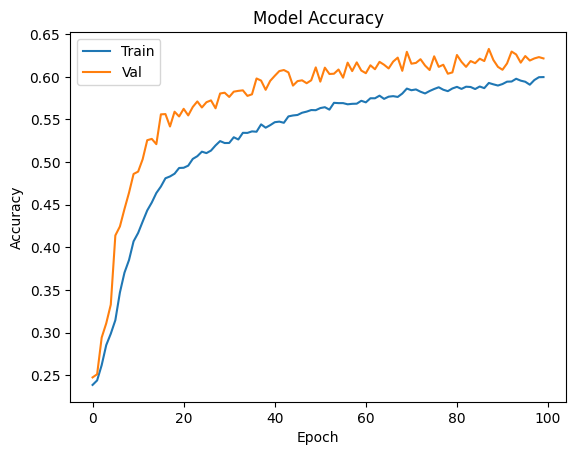

In [ ]:
# Plot the accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# load json and create model
json_file = open('/content/drive/MyDrive/Facial_Emotion_Recognition/model100d.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Facial_Emotion_Recognition/model100d.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
face_haar_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Facial_Emotion_Recognition/haarcascade_frontalface_default.xml')
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
label_dict

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happiness',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [ ]:
calm_xlsx = pd.read_excel('/content/drive/MyDrive/Facial_Emotion_Recognition/Calm.xlsx')
happy_xlsx = pd.read_excel('/content/drive/MyDrive/Facial_Emotion_Recognition/Happy.xlsx')
sad_xlsx = pd.read_excel('/content/drive/MyDrive/Facial_Emotion_Recognition/sad.xlsx')
energetic_xlsx = pd.read_excel('/content/drive/MyDrive/Facial_Emotion_Recognition/energetic.xlsx')

happy = list(happy_xlsx['Song Name'])
calm = list(calm_xlsx['Song Name'])
sad = list(sad_xlsx['Song Name'])
energetic = list(energetic_xlsx['Song Name'])
happy_links = list(happy_xlsx['Id'])
calm_links = list(calm_xlsx['Id'])
sad_links = list(sad_xlsx['Id'])
energetic_links = list(energetic_xlsx['Id'])

In [ ]:
# import dependencies required for Webcam - Google Colab
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
### Moodify Fuction ###
def Moodify(quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_haar_cascade.detectMultiScale(gray, 1.3, 5)
  song = ' '
  play = ''
  for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray, (48,48))
    img_pixels = image.img_to_array(roi_gray)
    img_pixels = np.expand_dims(img_pixels, axis=0)

    predictions = loaded_model.predict(img_pixels)
    emotion_label = np.argmax(predictions)

    emotion_prediction = label_dict[emotion_label]

    cv2.putText(img, emotion_prediction, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 1 )

    resize_image = cv2.resize(img, (1000,700))
    cv2_imshow(resize_image)
    print("\n\n Emotion - ", emotion_prediction)
    if(emotion_prediction == 'Happiness' or emotion_prediction == 'Surprise'):
      play = random.choice(happy_links)
      song = happy[happy_links.index(play)]
    elif(emotion_prediction == 'Disgust' or emotion_prediction == 'Angry'):
      play = random.choice(energetic_links)
      song = energetic[energetic_links.index(play)]
    elif(emotion_prediction == 'Neutral'):
      play = random.choice(calm_links)
      song = calm[calm_links.index(play)]
    elif(emotion_prediction == 'Sad' or emotion_prediction == 'Fear'):
      play = random.choice(sad_links)
      song = sad[sad_links.index(play)]
  print("\n\n Now Playing - ", song)
  return play

In [ ]:
player = Moodify()
YouTubeVideo(player, width=1, height=1, allow_autoplay = True)

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored